In [1]:
import sys
sys.dont_write_bytecode = True
import numpy as np
from testing_suite import *
from parameters import *
from algorithm import *
import functions as fcn
import time
import matplotlib.pyplot as plt
import math
import itertools
import random as rand

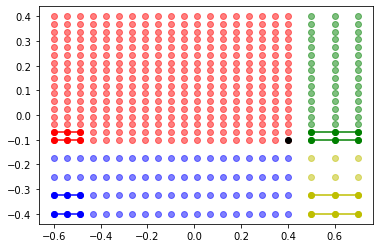

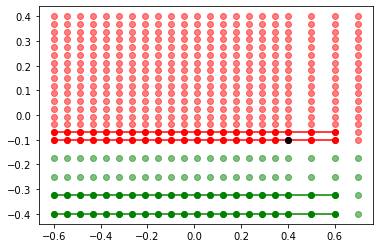

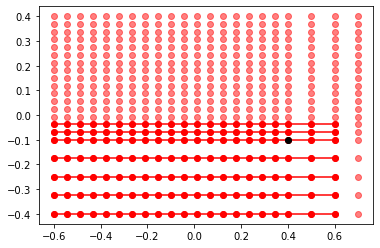

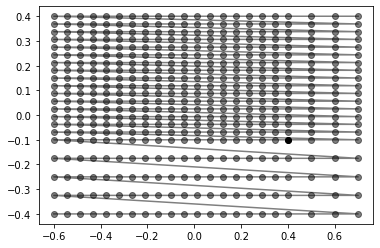

In [2]:
# grid
n_p = np.array([18,3,4,16]) # u-, u+, v-, v+
B_p = np.array([1,0.3,0.3,0.5]) # u-, u+, v-, v+
fp = np.array([0.4,-0.1]) # u, v

um = np.linspace(fp[0]-B_p[0], fp[0], n_p[0]+1) # u- to u*
up = np.linspace(fp[0], fp[0]+B_p[1], n_p[1]+1) # u* to u+
vm = np.linspace(fp[1]-B_p[2], fp[1], n_p[2]+1) # v- to v*
vp = np.linspace(fp[1], fp[1]+B_p[3], n_p[3]+1) # v* to v+

u_mp, v_mp = np.meshgrid(um, vp, indexing='ij') # exclude none
u_pp, v_pp = np.meshgrid(up[1:], vp, indexing='ij') # exclude u*
u_mm, v_mm = np.meshgrid(um, vm[:-1], indexing='ij') # exclude v*
u_pm, v_pm = np.meshgrid(up[1:], vm[:-1], indexing='ij') # exclude u* and v*

plt.figure()
plt.plot(u_mp, v_mp, marker='o', color='r', linestyle='none', alpha=0.5)
plt.plot(u_pp, v_pp, marker='o', color='g', linestyle='none', alpha=0.5)
plt.plot(u_mm, v_mm, marker='o', color='b', linestyle='none', alpha=0.5)
plt.plot(u_pm, v_pm, marker='o', color='y', linestyle='none', alpha=0.5)
plt.plot(u_mp[0:3,0:2], v_mp[0:3,0:2], marker='o', color='r')
plt.plot(u_pp[0:3,0:2], v_pp[0:3,0:2], marker='o', color='g')
plt.plot(u_mm[0:3,0:2], v_mm[0:3,0:2], marker='o', color='b')
plt.plot(u_pm[0:3,0:2], v_pm[0:3,0:2], marker='o', color='y')
plt.plot(fp[0], fp[1], marker='o', color='k')
plt.show()

u_vp = np.concatenate((u_mp, u_pp))
v_vp = np.concatenate((v_mp, v_pp))
u_vm = np.concatenate((u_mm, u_pm))
v_vm = np.concatenate((v_mm, v_pm))

plt.figure()
plt.plot(u_vp, v_vp, marker='o', color='r', linestyle='none', alpha=0.5)
plt.plot(u_vm, v_vm, marker='o', color='g', linestyle='none', alpha=0.5)
plt.plot(u_vp[0:21,0:2], v_vp[0:21,0:2], marker='o', color='r')
plt.plot(u_vm[0:21,0:2], v_vm[0:21,0:2], marker='o', color='g')
plt.plot(fp[0], fp[1], marker='o', color='k')
plt.show()

u = np.concatenate((u_vm, u_vp), axis=1)
v = np.concatenate((v_vm, v_vp), axis=1)

plt.figure()
plt.plot(u, v, marker='o', color='r', linestyle='none', alpha=0.5)
plt.plot(u[0:21,0:7], v[0:21,0:7], marker='o', color='r')
plt.plot(fp[0], fp[1], marker='o', color='k')
plt.show()

points = np.transpose(np.vstack([u.ravel(order='F'), v.ravel(order='F')]))

plt.figure()
plt.plot(points[:,0], points[:,1], marker='o', color='k', alpha=0.5)
plt.plot(fp[0], fp[1], marker='o', color='k')
plt.show()

In [3]:
# all permutations
my_dict = {
    'code': np.array([100001]),
    'A': np.arange(100,600,100),
    'B': np.arange(1000,6000,1000)
}

keys, values = zip(*my_dict.items())
permutations_dicts = [dict(zip(keys, v)) for v in itertools.product(*values)]

print(sorted([np.array(list(d.values())).sum() for d in permutations_dicts]))

[101101, 101201, 101301, 101401, 101501, 102101, 102201, 102301, 102401, 102501, 103101, 103201, 103301, 103401, 103501, 104101, 104201, 104301, 104401, 104501, 105101, 105201, 105301, 105401, 105501]


(5, 1000)


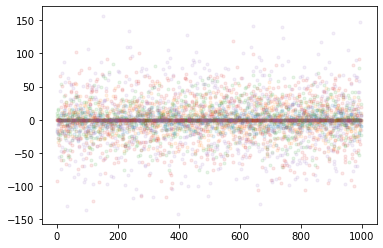

In [4]:
# gaussian mutation

def m_gaussian(pop, scores, P):
    gaussian_values = np.random.normal(np.zeros(pop.shape[0]), scores, pop.transpose().shape)
    probability_mask = np.random.binomial(1, P, size=pop.transpose().shape)
    return np.add(pop, np.multiply(gaussian_values, probability_mask).transpose())

pop = np.zeros((5,1000))
scores = np.arange(10,60,10)
print(pop.shape)
P = 0.7

pop = m_gaussian(pop, scores, P)

plt.figure(7)
plt.plot(pop.transpose(), '.', alpha=0.1)
plt.show()

In [5]:
pop = np.arange(10, 100, 10)
weights = [100,50,0,0,10,5,0,0,0]
order = np.arange(0, len(weights), 1)
save = 3
print(pop)
print(order)
replacement_mask = np.concatenate((np.array(rand.choices(order[save+1:], weights=weights[save+1:], k=len(weights)-save)), order[-save:]))
print(replacement_mask)
print(np.take_along_axis(pop, replacement_mask, axis=0))

[10 20 30 40 50 60 70 80 90]
[0 1 2 3 4 5 6 7 8]
[4 4 5 5 4 4 6 7 8]
[50 50 60 60 50 50 70 80 90]


In [6]:
pop = np.array([
    [
        [1,2,3],
        [4,5,6]
    ],
    [
        [10,20,30],
        [40,50,60]
    ],
    [
        [100,200,300],
        [400,500,600]
    ]
])
idx = np.random.rand(pop.shape[0]).argsort(axis=0)
idx = idx
print(idx)
print(np.tile(idx, (*pop.shape[:-1],1)).transpose())
print(np.tile(idx, (*pop.shape[:-1],1)).transpose().shape)
print(pop.shape)
print(np.take_along_axis(pop, np.tile(idx, (*pop.shape[:-1],1)).transpose(), axis=0))

[2 1 0]
[[[2 2 2]
  [2 2 2]]

 [[1 1 1]
  [1 1 1]]

 [[0 0 0]
  [0 0 0]]]
(3, 2, 3)
(3, 2, 3)
[[[100 200 300]
  [400 500 600]]

 [[ 10  20  30]
  [ 40  50  60]]

 [[  1   2   3]
  [  4   5   6]]]


In [7]:
printing_dict = {
    'first_one': 'code',
    'sub_sub': [1,2,5,19],
    'what_when_np': np.arange(1,7)
}
printer = "PARAMETERS"
for k, v in printing_dict.items():
    printer = printer + "__" + k + "=" + str(v)
print(printer)

PARAMETERS__first_one=code__sub_sub=[1, 2, 5, 19]__what_when_np=[1 2 3 4 5 6]


In [8]:
c_fp = np.array([
    [172 - 137*43**0.5], 
    [215 + 44*43**0.5], 
    [49*(1003*43**0.5 - 989)/(288*math.pi)]
]) # N+1 x N-M coefficients c_fp[n',mu] [!] this line is specifically 2D

theory_parameters = Parameters(
    code = 'T', 
    beta_functions = fcn.beta, 
    fixed_point = np.array([343/(288*math.pi), -49/(288*math.pi)]), 
    true_result = 0.15, 
    linear_generating_function = fcn.F_fp, 
    M=1,
    identifier='2Dscalar01'
)

meta_parameters = Parameters(
    code = 'M', 
    collocation_point_numbers = np.array([np.array([4,1,2,6])]), 
    collocation_point_bounds = np.array([np.array([.5,.3,.3,.5])]), 
    basis_functions = np.array([fcn.psi]), 
    basis_functions_derivatives = np.array([fcn.dpsi]), 
    do_fix_parameters = np.array([False]), 
    population_size = np.array([4]), 
    algorithm = np.array([GeneticAlgorithm('G', True)])
)

# keep_percent, crossover_percent, mutation_percent, mutation_amount, fitness_code, selection_code, mutation_code, crossover_code, iteration_cap
control_parameters = Parameters(
    code = 'C', 
    keep_percent = np.array([.1]),
    crossover_percent = np.array([.04]),
    mutation_percent = np.array([.001, .005, .01, .05]),
    mutation_amount = np.array([.0005, .001, .005, .01]),
    fitness_code = np.array(['abs']),
    selection_code = np.array(['roulette']),
    mutation_code = np.array(['gaussian']),
    crossover_code = np.array(['one_point']),
    iteration_cap = np.array([1000])
)

In [9]:
suite = Suite(theory_parameters=theory_parameters, meta_parameters=meta_parameters, control_parameters=control_parameters, export_directory='C:\\Users\\Stijn Hennissen\\Jupyter Notebooks\\Nast Thesis\\Testing suite\\suit_result_files')
suite.run_all()
print(suite.get_combination_number())


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:243: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


Meta: 0/1 (0.0%%); Control: 15/16 (93.75%%); Total: 15/16 (93.75%%);
16
